# NAML project - Stroke prediction
Cavallini - Eusebio

In [97]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install imblearn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


We start by loading the dataset and visualizing the data 

In [99]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [100]:
dataset['hypertension'] = dataset['hypertension'].astype('category')
dataset['heart_disease'] = dataset['heart_disease'].astype('category')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
dtypes: category(2), float64(3), int64(2), object(5)
memory usage: 409.6+ KB


There are clearly some NaN values in the dataset, we will have to deal with them.
Since in the paper it was mentioned that that there were no missing values, we will drop such rows.

In [102]:
dataset = dataset.drop(['id'], axis=1)
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4909 non-null   object  
 1   age                4909 non-null   float64 
 2   hypertension       4909 non-null   category
 3   heart_disease      4909 non-null   category
 4   ever_married       4909 non-null   object  
 5   work_type          4909 non-null   object  
 6   Residence_type     4909 non-null   object  
 7   avg_glucose_level  4909 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     4909 non-null   object  
 10  stroke             4909 non-null   int64   
dtypes: category(2), float64(3), int64(1), object(5)
memory usage: 393.3+ KB


We will start by visualizing the data to get a better understanding of the dataset. <br>
In particular, we will look at the distribution of the features and the target variable.

In [103]:
dataset.describe()

,age,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237,0.042575
std,22.555115,44.424341,7.854067,0.201917
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.070000,23.500000,0.000000
50%,44.000000,91.680000,28.100000,0.000000
75%,60.000000,113.570000,33.100000,0.000000
max,82.000000,271.740000,97.600000,1.000000


In [104]:
dataset.drop_duplicates(inplace=True)

In [105]:
#we want to group by age in age groups
dataset['age_group'] = pd.cut(dataset['age'], bins=[0, 17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100], labels=['17-', '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-75', '75+'])

# remove age less than 18
dataset = dataset[dataset['age_group'] != '17-']

<AxesSubplot:xlabel='age_group', ylabel='count'>

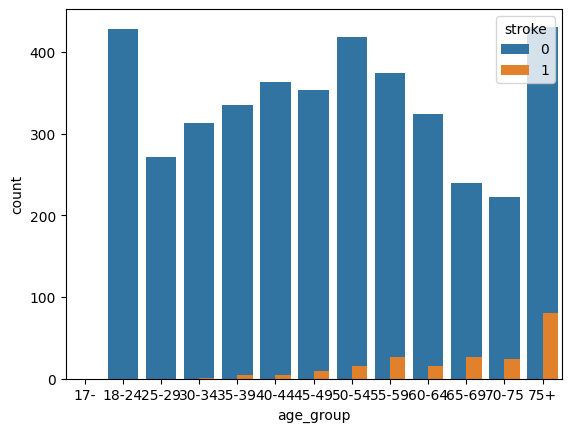

In [106]:
sns.countplot(x='age_group', data=dataset)
sns.countplot(x='age_group', hue='stroke', data=dataset)

From this plot is difficult to see the real correlation between the features and the target variable. <br>
This is due to the fact that the dataset is unbalanced.

In [107]:
dataset.describe()

,age,avg_glucose_level,bmi,stroke
count,4073.000000,4073.000000,4073.000000,4073.000000
mean,49.901056,107.610449,30.432752,0.051068
std,17.790731,46.943005,7.235143,0.220164
min,18.000000,55.120000,11.300000,0.000000
25%,36.000000,77.260000,25.400000,0.000000
50%,50.000000,92.210000,29.200000,0.000000
75%,63.000000,115.420000,34.200000,0.000000
max,82.000000,271.740000,92.000000,1.000000


## Data preprocessing

No stroke:  3865
Stroke:  208
Entries:  4073
Stroke ratio:  0.051068008838693835


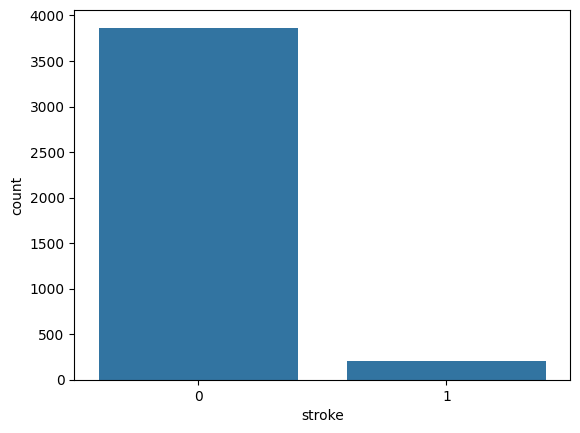

In [108]:
sns.countplot(x='stroke', data=dataset)

stroke_count = dataset['stroke'].value_counts()
no_stroke = stroke_count[0]
stroke = stroke_count[1]
entries = no_stroke + stroke

print('No stroke: ', no_stroke)
print('Stroke: ', stroke)
print('Entries: ', entries)
print('Stroke ratio: ', stroke/entries) 

It is evident that the dataset is strongly unbalanced towards the non-stroke cathegory. <br>
In fact the percentage of patients who had a stroke in the dataset is $ \le $ 5%.

Since this is non ideal for the training of a model, we will have to balance the dataset before training the model. <br>
The method proposed in the paper is to use the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset.

However we first need to preprocess the data, by encoding the categorical variables and normalizing the numerical variables.

In [109]:
features = np.array(dataset.columns[:-2])
print(features)

X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

print(X)
print(y)

['gender' 'age' 'hypertension' 'heart_disease' 'ever_married' 'work_type'
 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status']
[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ['Female' 49.0 0 ... 171.23 34.4 'smokes']
 ...
 ['Female' 35.0 0 ... 82.99 30.6 'never smoked']
 ['Male' 51.0 0 ... 166.29 25.6 'formerly smoked']
 ['Female' 44.0 0 ... 85.28 26.2 'Unknown']]
[1 1 1 ... 0 0 0]


Since the dataset uses a mix of numerical and categorical variables, we will use a variation of SMOTE called SMOTENC, which is able to handle both types of variables.

In [110]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], sampling_strategy='minority')

X, y = smote.fit_resample(X, y)

print(X)
print(y)


[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ['Female' 49.0 0 ... 171.23 34.4 'smokes']
 ...
 ['Female' 50.062557882359144 0 ... 86.32136599624772 28.84997221646761
  'never smoked']
 ['Female' 35.310602877517084 0 ... 67.59810344137026 34.29837239441556
  'never smoked']
 ['Male' 56.1031214768287 0 ... 185.2530127888471 40.36261846464959
  'formerly smoked']]
[1 1 1 ... 1 1 1]


      gender        age hypertension heart_disease ever_married  \
0       Male       67.0            0             1          Yes   
1       Male       80.0            0             1          Yes   
2     Female       49.0            0             0          Yes   
3     Female       79.0            1             0          Yes   
4       Male       81.0            0             0          Yes   
...      ...        ...          ...           ...          ...   
7725  Female  53.250995            0             0          Yes   
7726  Female  56.050922            0             0          Yes   
7727  Female  50.062558            0             0          Yes   
7728  Female  35.310603            0             0          Yes   
7729    Male  56.103121            0             0          Yes   

          work_type Residence_type avg_glucose_level        bmi  \
0           Private          Urban            228.69       36.6   
1           Private          Rural            105.92       32

<AxesSubplot:xlabel='stroke', ylabel='count'>

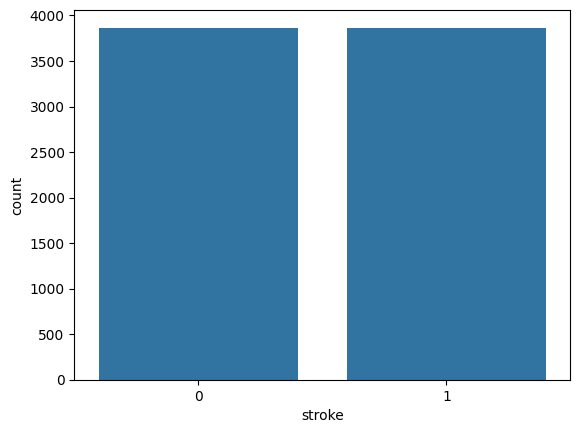

In [111]:
block = np.block([[X, y[:, None]]])
dataset_balanced = pd.DataFrame(block, columns=features.tolist() + ['stroke'])

print(dataset_balanced)

sns.countplot(x='stroke', data=dataset_balanced)

As we can see, the dataset is now balanced, and we can proceed with the training of the model.

## Data visualization

In [112]:
#we want to group by age in age groups
dataset_balanced['age_group'] = pd.cut(dataset_balanced['age'], bins=[0, 17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100], labels=['17-', '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-75', '75+'])

Now we can visualize the data to get a better understanding of the dataset. <br>
In particular, the trend of stroke is clearly correlated to age and more visible in the data.

<AxesSubplot:xlabel='age_group', ylabel='percent'>

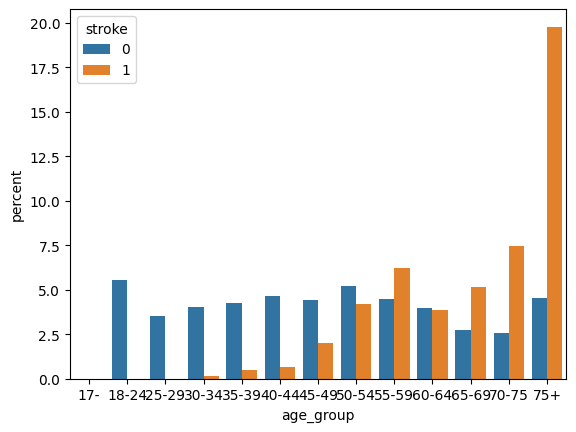

In [113]:
sns.countplot(x='age_group',hue='stroke', data=dataset_balanced, stat='percent')

Another way to visualize the same data is to color the percentage of stroke in the dataset per age-group. <br>

<AxesSubplot:xlabel='age_group', ylabel='percent'>

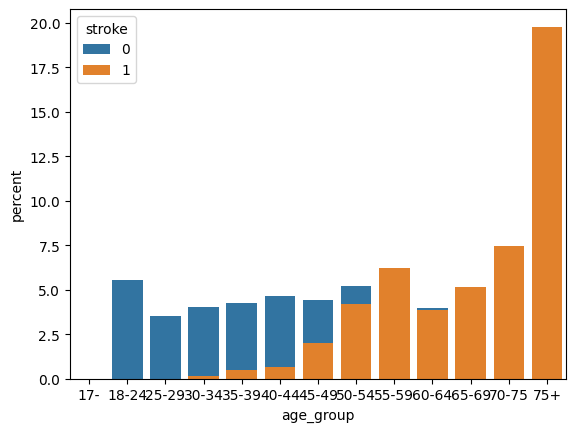

In [114]:
sns.countplot(x='age_group', hue='stroke', data=dataset_balanced, dodge=False, stat='percent')

<AxesSubplot:xlabel='gender', ylabel='percent'>

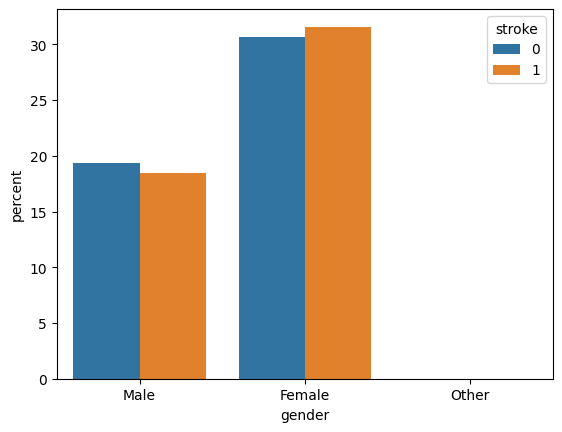

In [115]:
sns.countplot(x='gender', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='hypertension', ylabel='percent'>

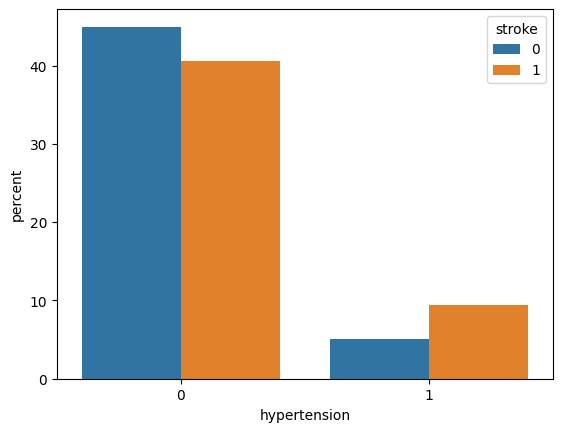

In [116]:
sns.countplot(x='hypertension', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='heart_disease', ylabel='percent'>

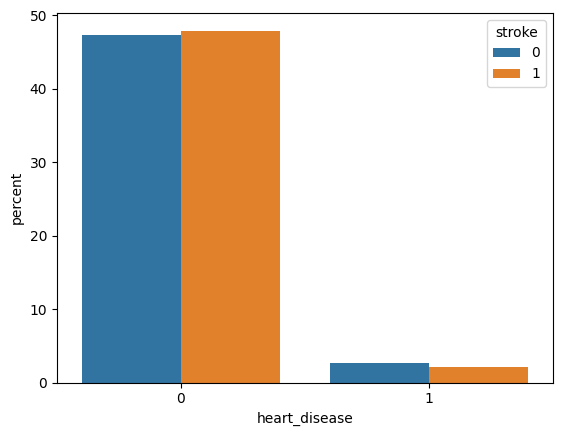

In [117]:
sns.countplot(x='heart_disease', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='ever_married', ylabel='percent'>

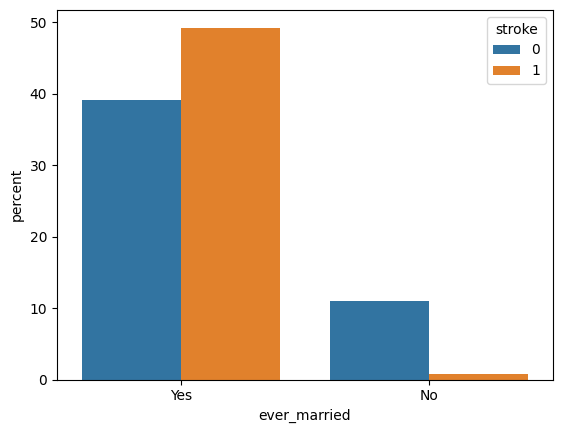

In [118]:
sns.countplot(x='ever_married', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='work_type', ylabel='percent'>

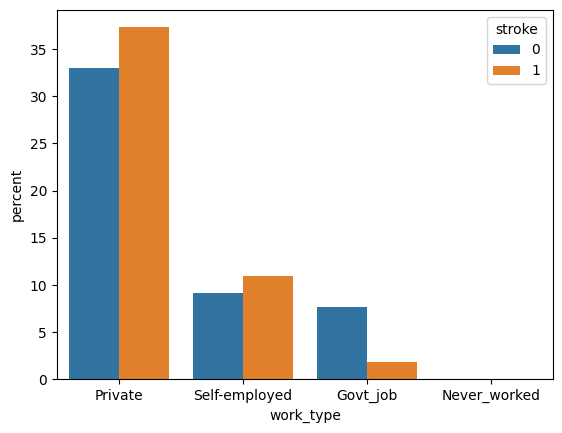

In [119]:
sns.countplot(x='work_type', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='Residence_type', ylabel='percent'>

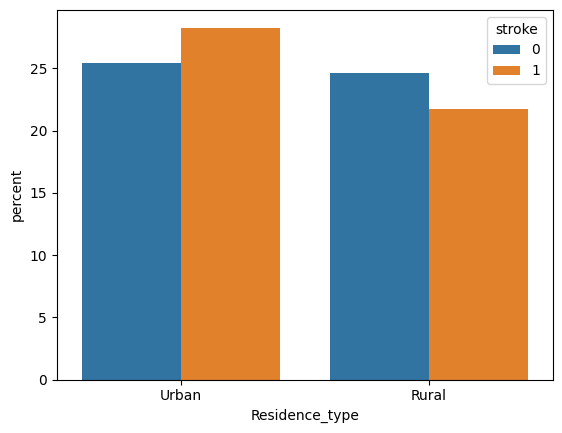

In [120]:
sns.countplot(x='Residence_type', hue='stroke', data=dataset_balanced, stat='percent')

<AxesSubplot:xlabel='smoking_status', ylabel='percent'>

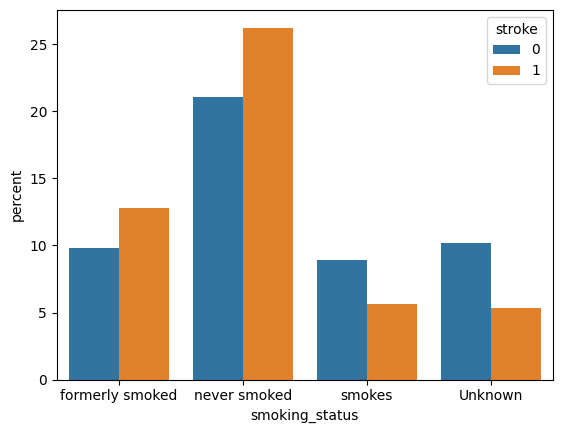

In [121]:
sns.countplot(x='smoking_status', hue='stroke', data=dataset_balanced, stat='percent')

In [122]:
dataset_balanced['BMI CATEGORY'] = pd.cut(dataset_balanced['bmi'], bins=[0, 18.5, 25.0, 30.0, 35.0, 40.0, 100], labels=['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

<AxesSubplot:xlabel='BMI CATEGORY', ylabel='percent'>

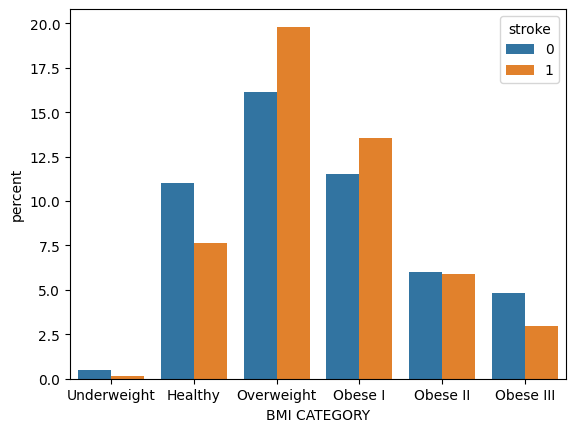

In [123]:
sns.countplot(x='BMI CATEGORY', hue='stroke', data=dataset_balanced, stat='percent')